In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from scipy.fft import fft, fftfreq

In [2]:
ref = np.loadtxt(fname='ref.csv', delimiter=' ')

ref

array([[-2.,  2.,  1.],
       [-1.,  3.,  2.],
       [ 0.,  4.,  2.],
       [ 1.,  5.,  2.],
       [ 2.,  6.,  3.],
       [ 3.,  7.,  3.],
       [ 4.,  8.,  3.],
       [ 5.,  9.,  4.],
       [ 6., 10.,  4.],
       [ 7., 11.,  4.],
       [ 8., 12.,  4.],
       [ 9., 13.,  4.],
       [10., 14.,  5.]])

In [3]:
sample = np.loadtxt(fname='sample.csv', delimiter=' ')
sample

array([[ -2.,  21.,   1.],
       [ -1.,  32.,   2.],
       [  0.,  43.,   2.],
       [  1.,  52.,   2.],
       [  2.,  61.,   3.],
       [  3.,  71.,   3.],
       [  4.,  84.,   3.],
       [  5.,  93.,   4.],
       [  6., 102.,   4.],
       [  7., 113.,   4.],
       [  8., 123.,   4.],
       [  9., 132.,   4.],
       [ 10., 141.,   5.]])

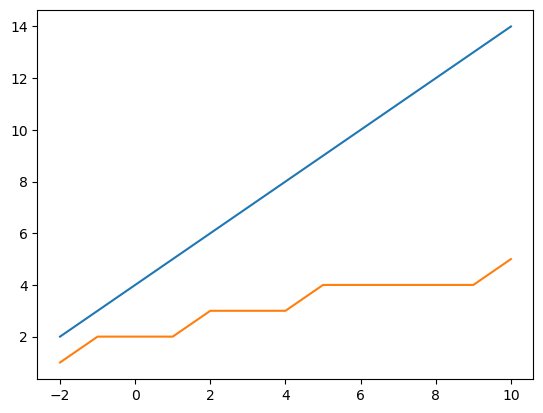

In [4]:
image = plt.plot(ref[:,0], ref[:,1])
image = plt.plot(ref[:,0], ref[:,2])
plt.show()

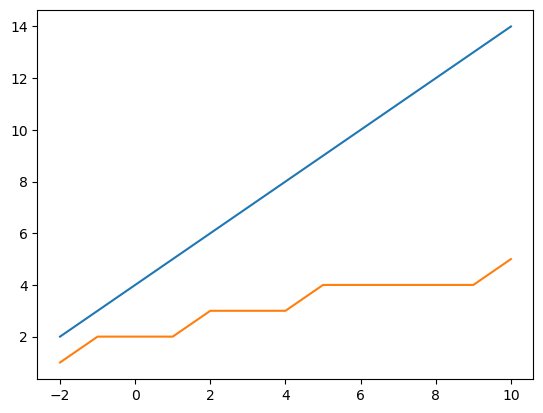

In [5]:
for col in range(1, ref.shape[1]):
    plt.plot(ref[:, 0], ref[:, col])

In [6]:
diff = ref[:, 2] - ref[:, 1]
diff

array([-1., -1., -2., -3., -3., -4., -5., -5., -6., -7., -8., -9., -9.])

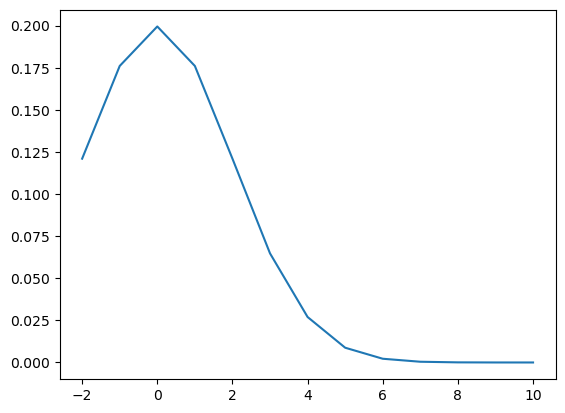

In [7]:
x = []
y = []
mean = 0.
std_dev = 2.
T = 1.  # sample spacing

for row in np.arange(-2., 10.0 + T/2., T):
    x.append(row)
    y.append(scipy.stats.norm.pdf(row, mean, std_dev))

gauss_image = plt.plot(x, y)
plt.show()

In [8]:
gauss_values = np.stack((x, y), axis=1)
np.savetxt("gauss.txt", gauss_values)
gauss_values

array([[-2.00000000e+00,  1.20985362e-01],
       [-1.00000000e+00,  1.76032663e-01],
       [ 0.00000000e+00,  1.99471140e-01],
       [ 1.00000000e+00,  1.76032663e-01],
       [ 2.00000000e+00,  1.20985362e-01],
       [ 3.00000000e+00,  6.47587978e-02],
       [ 4.00000000e+00,  2.69954833e-02],
       [ 5.00000000e+00,  8.76415025e-03],
       [ 6.00000000e+00,  2.21592421e-03],
       [ 7.00000000e+00,  4.36341348e-04],
       [ 8.00000000e+00,  6.69151129e-05],
       [ 9.00000000e+00,  7.99187055e-06],
       [ 1.00000000e+01,  7.43359757e-07]])

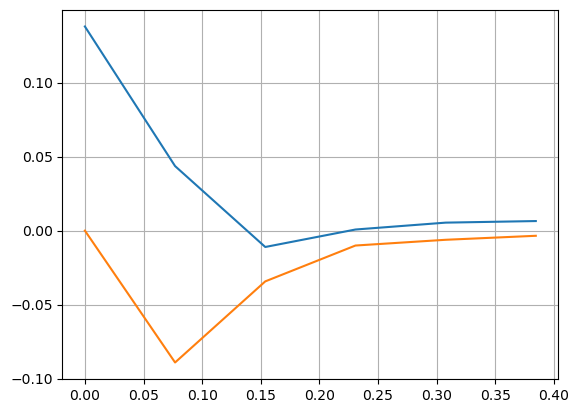

In [13]:
N = len(x)

yf = fft(y)
xf = fftfreq(N, T)
plt.plot(xf[:N//2], 2.0/N * np.real(yf[0:N//2]))
plt.plot(xf[:N//2], 2.0/N * np.imag(yf[0:N//2]))
plt.grid()
plt.show()

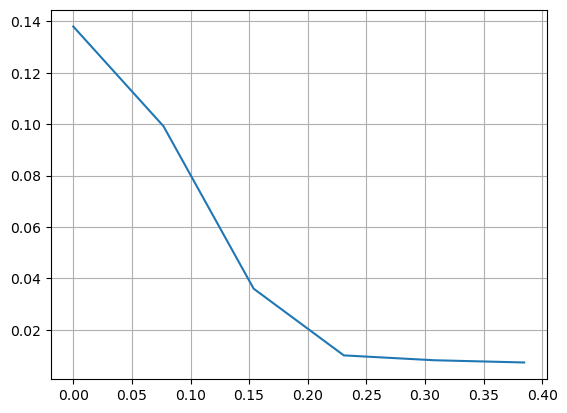

In [14]:
plt.plot(xf[:N//2], 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()